In [1]:
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append("../")
from tcad.tools.nntools import SmilesDataSet, SmilesEncoder
from tcad.deep.fit import train_gan
from torch.utils.data import DataLoader
from tcad.deep.models import GAN
import matplotlib.pyplot as plt
import torch

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()

smiles_dataset = SmilesDataSet(smiles)
senc = SmilesEncoder(smiles)
dataloader = DataLoader(smiles_dataset, batch_size=128)

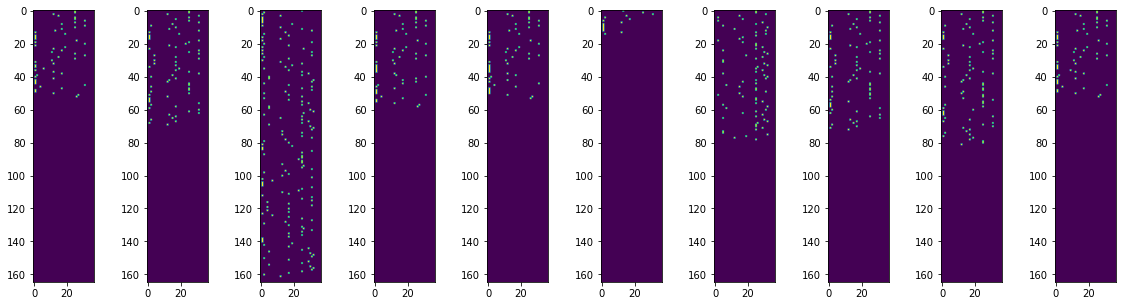

In [3]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(smiles_dataset[i].squeeze())

In [4]:
GENERATOR_LEARNING_RATE = 0.0002
DISCRIMINATOR_LEARNING_RATE = 0.0002

model = GAN(240).to(DEVICE)

optim_gen = torch.optim.Adam(model.generator.parameters(),
                             betas=(0.5, 0.999),
                             lr=GENERATOR_LEARNING_RATE)

optim_discr = torch.optim.Adam(model.discriminator.parameters(),
                               betas=(0.5, 0.999),
                               lr=DISCRIMINATOR_LEARNING_RATE)

In [24]:
train_gan(dataloader, model, optim_gen, optim_discr, epochs=500)

Epoch: 0 Discriminator loss: 0.0005243063787929714 Generator loss: 7.5936479568481445
Epoch: 10 Discriminator loss: 0.001014583744108677 Generator loss: 6.7670369148254395
Epoch: 20 Discriminator loss: 0.00020751850388478488 Generator loss: 9.067666053771973
Epoch: 30 Discriminator loss: 0.000256162544246763 Generator loss: 9.229262351989746
Epoch: 40 Discriminator loss: 0.00038236979162320495 Generator loss: 8.804571151733398
Epoch: 50 Discriminator loss: 0.00042812235187739134 Generator loss: 7.929310321807861
Epoch: 60 Discriminator loss: 0.00022769978386349976 Generator loss: 8.40565013885498
Epoch: 70 Discriminator loss: 0.0001294521352974698 Generator loss: 9.131922721862793
Epoch: 80 Discriminator loss: 0.00014474528143182397 Generator loss: 9.069024085998535
Epoch: 90 Discriminator loss: 0.00036562452442012727 Generator loss: 7.903460502624512
Epoch: 100 Discriminator loss: 0.00020423272508196533 Generator loss: 8.404561996459961
Epoch: 110 Discriminator loss: 0.000122865967568

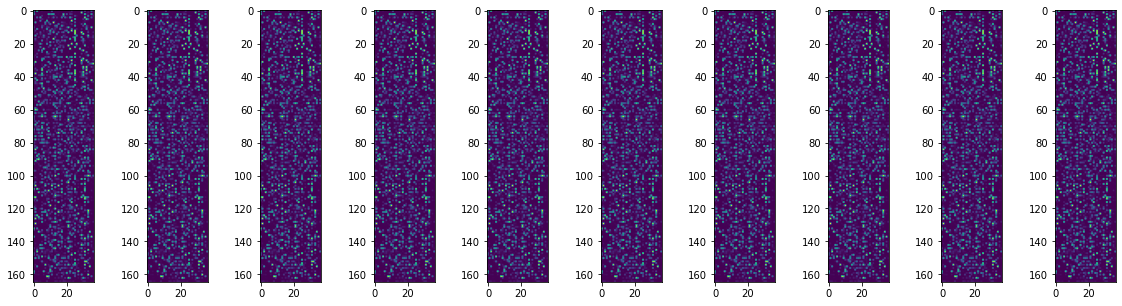

In [25]:
noise = torch.randn(128, model.latent_dim, device=DEVICE)

out = model.generator_forward(noise).detach().cpu().numpy().squeeze()

_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(out[i])